# Option pricing with MC Simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyfeng as pf
import scipy.stats as scst

In [2]:
sigma = 0.2
texp = 1
spot = 100
m_bs = pf.Bsm(sigma)

In [3]:
# Generate random numbers
z = np.random.normal(size=100000)
#anti-thetic

## Black-Scholes model (Geomegric Brownian Motion)

In [4]:
# Black-Scholes-Merton model (Geometric BM)
s_bsm = spot * np.exp(-(sigma**2)*texp/2 + sigma*np.sqrt(texp)*z)
print(s_bsm)

[ 94.32976011  80.14252107  79.60990072 ...  73.56669319 110.09707926
  92.73553078]


In [5]:
## Sanity check
np.mean(s_bsm), np.std(s_bsm)
scst.describe(s_bsm)

DescribeResult(nobs=100000, minmax=(41.2708272498683, 249.75460091733189), mean=99.95973363311458, variance=409.55989020070615, skewness=0.629323114013088, kurtosis=0.7374466285320245)

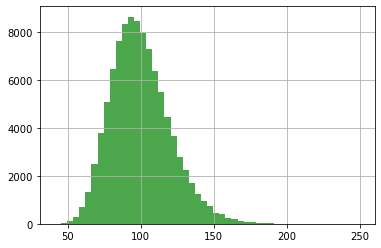

In [6]:
# the histogram of the data
n, bins, patches = plt.hist(s_bsm, 50, facecolor='green', alpha=0.7)
plt.grid(True)
plt.show()

In [7]:
### Price a call option

strike = 102
#cp_sign = 1
price = np.mean(np.fmax(s_bsm - strike, 0))
print( price )

7.075288099400038


In [8]:
# Exact price
m_bs.price(strike, spot, texp)

7.084494247829895

In [9]:
### Can price different options without extra computation

strike = 98
cp_sign = -1
price = np.mean(np.fmax(cp_sign*(s_bsm - strike), 0))
print( price )

6.952869626275089


In [10]:
# Exact price
m_bs.price(strike, spot, texp, cp=-1)

6.925974960378305

## Bachelier Model (Arithmetic Brownian Motion)

In [11]:
sigma = 20
texp = 1
spot = 100
m_norm = pf.Norm(sigma)

In [12]:
s_norm = spot + sigma * np.sqrt(texp) * z

In [13]:
strike = 102
cp_sign = 1
price = np.mean(np.fmax(s_norm - strike, 0))
print( price )

7.006550181429083


In [14]:
# Exact price
m_norm.price(strike, spot, texp)

7.018706624094294

In [15]:
strike = 98
cp_sign = -1
price = np.mean(np.fmax(cp_sign*(s_norm - strike), 0))
print( price )

7.047434402925551


In [16]:
# Exact price
m_norm.price(strike, spot, texp, cp=-1)

7.018706624094294